In [1]:
import matplotlib.pyplot as plt

def get_val_losses(path):
    losses = []
    with open(path) as f:
        for line in f.readlines():
            parts = line.split(',')
            if len(parts) == 6 and parts[0] == "('epoch'":
                losses.append(float(parts[5][:-2]))
    return losses

normal_lstm = get_val_losses('logs/sms/normal.log')
additive_sigmoid = get_val_losses('logs/sms/additive_sigmoid.log')
additive_relu6 = get_val_losses('logs/sms/additive_no_sigmoid_relu6.log')
additive_linearapprox = get_val_losses('logs/sms/additive_no_sigmoid_linear.log')

x = list(range(600))
assert len(x) == len(normal_lstm) == len(additive_sigmoid) == len(additive_relu6) == len(additive_linearapprox)

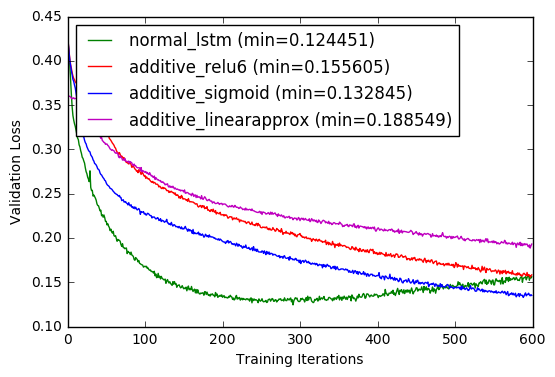

In [4]:
plt.clf()
# linestyle='--', marker='o', 
plt.plot(x, normal_lstm, color='g',label="normal_lstm (min=%f)" % min(normal_lstm))
plt.plot(x, additive_relu6, color='r', label="additive_relu6 (min=%f)" % min(additive_relu6))
plt.plot(x, additive_sigmoid, color='b', label="additive_sigmoid (min=%f)"% min(additive_sigmoid))
plt.plot(x, additive_linearapprox, color='m', label="additive_linearapprox (min=%f)"% min(additive_linearapprox))
plt.legend(loc=2)
plt.xlabel('Training Iterations')
plt.ylabel('Validation Loss')
plt.show()